In [2]:
import pandas as pd

# 3.1

In [8]:
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}


df1=pd.DataFrame(data_1)
df2=pd.DataFrame(data_2)
df3=pd.DataFrame(data_3)

df4=pd.concat([df1,df2],axis=0)
df5=pd.concat([df1,df2],axis=1)



In [9]:
df4


id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [10]:
df5

id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

In [12]:
dfmerge=pd.merge(df4,df3,how='outer',on='id')
dfmerge

In [13]:
dfmergeid=pd.merge(df4,df3,how='inner',on='id')
dfmergeid

id primer_nombre  apellido  test_id
0  1          Alex  Anderson       51
1  2           Amy    Ruales       15
2  3     Valentina     Marin       15
3  4         Alice   Barbosa       61
4  4          Luis      Ruiz       61
5  5          Lina    Robles       16
6  5         Brian   Giralgo       16
7  7       Marcela  Palacios       14
8  8        Carlos   Gallego       15

# 3.2

In [15]:
dfalc=pd.read_csv('datos_alcohol.txt')

dfalc.head()

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0  Afghanistan                  0                0               0   
1      Albania                 89              132              54   
2      Algeria                 25                0              14   
3      Andorra                245              138             312   
4       Angola                217               57              45   

   litros_totales_de_alcohol_puro continente  
0                             0.0         AS  
1                             4.9         EU  
2                             0.7         AF  
3                            12.4         EU  
4                             5.9         AF

In [28]:
dfconts=dfalc.groupby('continente').mean()
dfconts

porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

In [32]:
dfconts[dfconts['porciones_cerveza']==max(dfconts['porciones_cerveza'])]

porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
EU                 193.777778       132.555556      142.222222   

            litros_totales_de_alcohol_puro  
continente                                  
EU                                8.617778

In [35]:
dfalc['porciones_vino'].describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: porciones_vino, dtype: float64

In [38]:
print('Máximo: ', dfconts['porciones_licor'].max())
print('Mínimo: ', dfconts['porciones_licor'].min())
print('Media: ', dfconts['porciones_licor'].mean())
      

Máximo:  132.55555555555554
Mínimo:  16.339622641509433
Media:  76.58471745759482


In [40]:
dfconts.mean()

porciones_cerveza                 111.413153
porciones_licor                    76.584717
porciones_vino                     53.119244
litros_totales_de_alcohol_puro      4.697073
dtype: float64

# 3.3

In [45]:
dfvis=pd.read_csv('visualizacion.txt',index_col=0)
dfvis

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

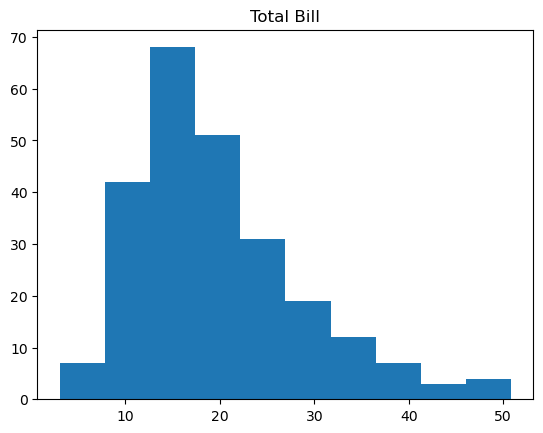

In [47]:
import matplotlib.pyplot as plt

plt.hist(dfvis['total_bill'])
plt.title('Total Bill')
plt.show()

Text(0, 0.5, 'Tip')

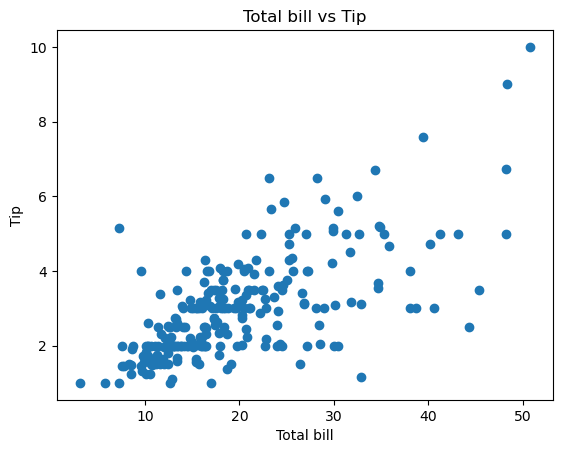

In [50]:
plt.scatter(dfvis['total_bill'],dfvis['tip'])
plt.title('Total bill vs Tip')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

In [66]:
dfvis.groupby('day').describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   

                     
      50%  75%  max  
day                  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  
Thur  2.0  2.0  6.0  

[4 rows x 24 columns]

In [61]:
dfvis.groupby('day').mean()

total_bill       tip      size
day                                 
Fri    17.151579  2.734737  2.105263
Sat    20.441379  2.993103  2.517241
Sun    21.410000  3.255132  2.842105
Thur   17.682742  2.771452  2.451613

En promedio el total bill es más alto los sábados

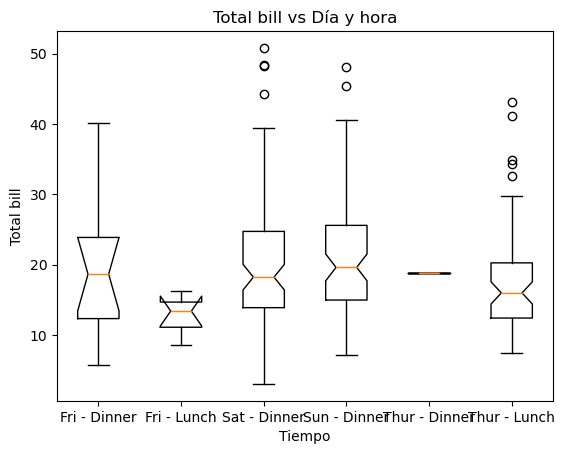

In [81]:
day_time = dfvis.groupby(['day', 'time'])
inter = [day_time.get_group(g) for g in day_time.groups]
tiempo = [f"{day} - {time}" for day, time in day_time.groups.keys()]

plt.boxplot([df['total_bill'] for df in inter],labels=tiempo)
plt.title('Total bill vs Día y hora')
plt.xlabel('Tiempo')
plt.ylabel('Total bill')
plt.show()